# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [2]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
# !gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp


## Part 1
### Question 1.1:  /10 points


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

In [3]:
# Read the car_data.csv files
df = pd.read_csv('car_data.csv')

# Display the top 5 rows of the dataframe in HTML
display(df.head())

,MPG,cylinders,displacement,horsepower,weight,acceleration,name
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,ford torino


Figure 1. Top 5 rows of the car data

In [4]:
# Show the descriptive statistics
df.describe()

,MPG,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Figure 2. Descriptive statistics

<AxesSubplot:title={'center':"Relationship Between the Cars' Weight And Their MPG"}, xlabel='weight', ylabel='MPG'>

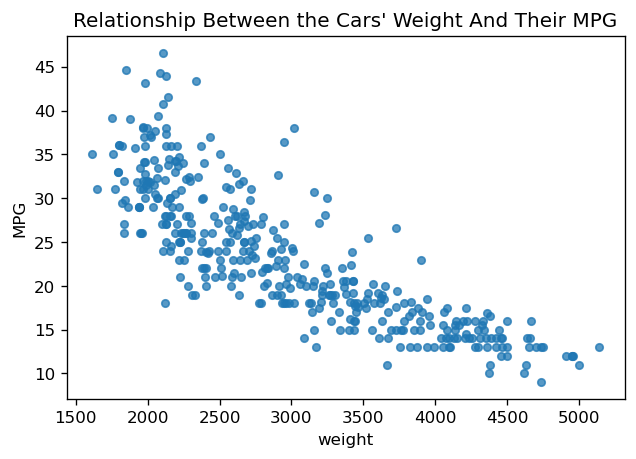

In [5]:
# plotting a scatter plot of the weight (x axis) and mpg columns (y axis)
fig, ax = plt.subplots(dpi = 120)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)

Figure 3. Relationship Between the Cars' Weight And Their MPG

**Written answer: What do you see here? Discuss your findings**

**As weight increases, MPG decreses. Also, it may not be not linear since the datas look quadaric a little bit.**

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [6]:
# function for computing linear model predictions given data and a coefficient vector
def linearModelPredict(b, X):
    #Get Model prediction
    predY = X @ b
    
    #return Model prediction
    return predY

In [7]:
# set X and b for testing
X = np.array([[1,0], [1,-1], [1,2]])
b = np.array([0.1, 0.3])

# print the answer
answer = linearModelPredict(b, X)
print("Predicted y: ", answer)

# print the dimensionality of the answer
print("Dimensionality: ", answer.shape)

Predicted y:  [ 0.1 -0.2  0.7]
Dimensionality:  (3,)


In [8]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 


In [9]:
# a function for for computing and returning the loss function for an OLS model parameterized by beta
# as well as the gradient of the loss
def linearModelLossRSS(b, X, y):
    # Get Model prediction
    predY = linearModelPredict(b, X)
    
    # Get the vector of residuals
    res = y - predY
    
    # Get the residuals sums of squares
    rss = sum(res**2)
    
    # Get the gradient
    gradient = -2 * (X.T @ res)
    
    # return rss and gradient
    return(rss, gradient)

In [10]:
# Set X, b, y
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# print the answers
answers = linearModelLossRSS(b, X, y)
print("The loss function for an OLS model parameterized by beta is", answers[0], 
      "and the gradient of the loss is", answers[1])

The loss function for an OLS model parameterized by beta is 2.06 and the gradient of the loss is [-3.6 -4. ]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

**I need to increase the value of the parameters since the gradient of the loss is negative.**

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [11]:
# function for fitting a linear model
def linearModelFit(X, y, lossfcn):
    # Set starting values
    colnum = X.shape[1] # get the number of column for X
    bstart = np.zeros((colnum, 1)) 
    
    # Call the optimization function
    RESULT = so.minimize(lossfcn, bstart, args=(X,y), jac=True)
    
    # get estimated betas
    betas = RESULT.x

    # calculate tss
    tss = sum((y - np.mean(y)) ** 2)
    
    # get rss
    rss, grad = linearModelLossRSS(betas, X, y)
    
    # calculate r2
    R2 = 1 - (rss/tss)
    
    # get answers
    answers = [betas, R2]
    
    # return answers
    return answers

In [12]:
# Set X, y for testing
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])

answers = linearModelFit(X,y,linearModelLossRSS)
print("Estimated betas:", answers[0])
print("R2:", answers[1])

Estimated betas: [0.6 0.6]
R2: 0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x). Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


R2:  0.6926304331206254


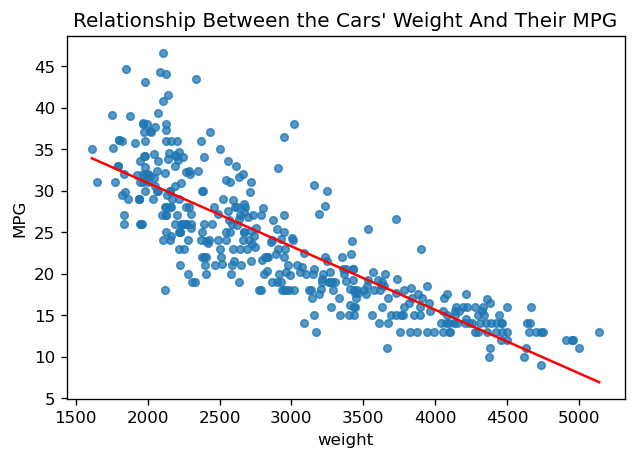

In [13]:
# create arrays for y and X
y = np.array(df.MPG)
weight = np.array(df.weight)
N = weight.size
X = np.c_[np.ones(N), weight]


# get batas and R2 using MPG and weight
betas, R2 = linearModelFit(X, y, linearModelLossRSS)
#print(betas)

# get grid
x_grid = np.linspace(weight.min(), weight.max(), 100)
#print(x_grid)
#print(x_grid.size)

# Make design
Xn = np.c_[np.ones(x_grid.size), x_grid]
#print(Xn)

# get prediction
yp = linearModelPredict(betas, Xn)

# make a plot
fig, ax = plt.subplots(dpi = 120)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)
ax.plot(x_grid, yp, color = 'red')

print("R2: ", R2)

Figure 4. Red line is a line for the predicted values

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [14]:
# a function for computing the least absolute deviation loss function for a linear model parameterized by beta
# as well as the gradient of the loss
def linearModelLossLAD(b,X,y):
    # Same concept as before, different loss
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    # Note the gradients are computed using the sign of the residuals
    grad =- (np.dot(sres,X))

    return (sum_abs_dev,grad)

In [15]:
# Set X, y, b for testing
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# print the loss and gradient
lad, grad =linearModelLossLAD(b,X,y)

print("LAD is", lad)
print("gradient:\n", grad)

(2.0, [-1.0, -2.0])


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



100
R^2:  0.6858713047001064


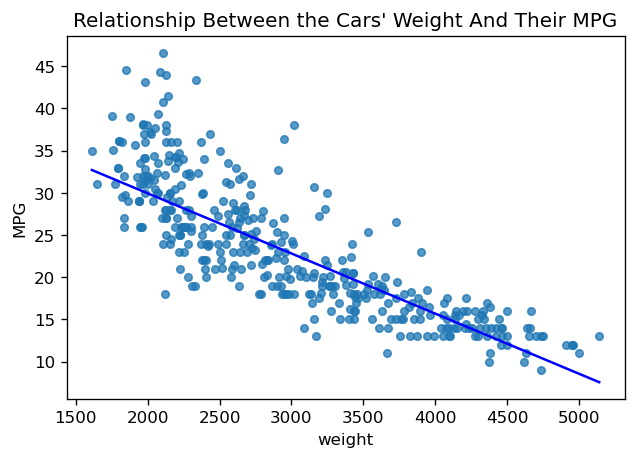

In [16]:
# create arrays for y and x
y = np.array(df.MPG)
weight = np.array(df.weight)
N = weight.size 
X = np.c_[np.ones(N), weight]

# get batas and R2 using MPG and weight
betas, R2 = linearModelFit(X, y, linearModelLossLAD)

#print(betas)

# get grid
x_grid = np.linspace(weight.min(), weight.max(), 100)
print(x_grid.size)

# Make design
Xn = np.c_[np.ones(x_grid.size), x_grid]

# get prediction
yp = linearModelPredict(betas, Xn)

# make a plot
fig, ax = plt.subplots(dpi = 120)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)

#b, r2 =  linearModelFit(X,y,linearModelLossRSS)
#x_grid2 = np.linspace(weight.min(), weight.max(), 100)
#Xn2 = np.c_[np.ones(x_grid2.size), x_grid2]
#yp2 = linearModelPredict(b, Xn2)
#ax.plot(x_grid2, yp2, color = 'red')

ax.plot(x_grid, yp, color = 'blue')

print("R^2: ", R2)

Figure 5. Blue line is the fitted line.

**(Note: L1 = LAD, L2 = OLS)**

**As the above, L1's R2 is 0.6858713047001064 and L2's R2 is 0.6926304331206254. L2's R2 is a little larger than L1's. Because OLS is minimizing the RSS, it will always have the highest R2 value possible for that class of models.**

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [13]:
from sklearn.linear_model import LinearRegression

# create an array for y and X
y = np.array(df.MPG)

# drop name and MPG datas
newdf = df.drop(columns=['name', 'MPG'])
#print(type(newdf))

# get the number of rows
N = newdf.shape[0]

# converts dataframe to numpy array
newarr = newdf.to_numpy()

# create X array 
X = np.c_[np.ones(N), newarr]

# Fit an OLS model to the car data 
reg = LinearRegression().fit(X, y)

#print r2
print("R2 from sklearn: ", reg.score(X, y))

###### or
# Here, I am showing my models a dataframe.
y = df.MPG.values
X = df.iloc[:, 1:6]
ols_fit = linear_model.LinearRegression().fit(X, y)

print('OLS rsquared: ', ols_fit.score(X,y).round(2))

R2 from sklearn:  0.7076926326770516
OLS rsquared:  0.71


The $R^2$ now is 0.71, which is very close to the 0.69 we have gotten using only weight. We can identify then that weight is the most important factor of the ones given here for the purposes of identifying MPG consumption.